In [1]:
import numpy as np
import pandas as pd

In [5]:
import os
print(os.getcwd())

C:\Users\gkvku\OneDrive\Desktop\jupyter\spam classification


In [14]:
df = pd.read_csv('C:/Users/gkvku/OneDrive/Desktop/jupyter/spam classification/spam.csv', encoding='ISO-8859-1')

In [15]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [16]:
df.shape

(5572, 5)

In [17]:
# Data cleaning
# EDA
# Text Preprocessing
# Model Building
# evaluation
# improvement

## Data Cleaning

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [19]:
# Drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [20]:
df.sample(5)

,v1,v2
833,ham,Thank you so much. When we skyped wit kz and s...
2516,ham,Yes.i'm in office da:)
538,ham,Ummmmmaah Many many happy returns of d day my ...
464,ham,Ok i am on the way to railway
581,ham,Ok anyway no need to change with what you said


In [23]:
# Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4507,ham,Not able to do anything.
5190,spam,Our records indicate u maybe entitled to 5000 ...
3215,spam,URGENT! We are trying to contact U. Todays dra...
1497,ham,I'm putting it on now. It should be ready for ...
5011,ham,U attend ur driving lesson how many times a wk...


In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [27]:
df['target'] = encoder.fit_transform(df['target'])

In [28]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [34]:
# Duplicate values
df.duplicated().sum()

403

In [38]:
# Remove Duplicates
df = df.drop_duplicates(keep='first')

In [39]:
df.duplicated().sum()

0

In [40]:
df.shape

(5169, 2)

## 2.EDA

In [44]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [47]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

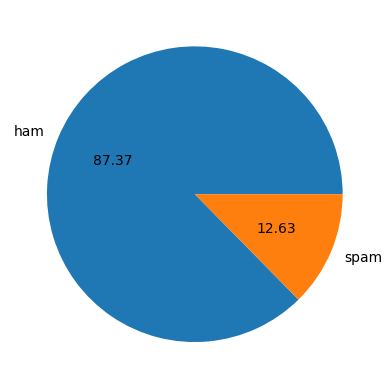

In [50]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [51]:
# Data is Imbalance

In [52]:
import nltk

In [53]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gkvku\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [56]:
df['num_characters'] = df['text'].apply(len)

In [58]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [66]:
# num of words
import re
df['num_words'] = df['text'].apply(lambda x: len(re.findall(r'\b\w+\b', x)))

In [69]:
df.drop(columns=['Word Count'],inplace=True)

In [70]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14


In [76]:
# number of sentences
from nltk.tokenize import sent_tokenize
df['num_sentences'] = df['text'].apply(lambda x: len(sent_tokenize(x)))

In [77]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1


In [78]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.989940,1.965564
std,58.236293,11.518372,1.448541
min,2.000000,0.000000,1.000000
25%,36.000000,8.000000,1.000000
50%,60.000000,12.000000,1.000000
75%,117.000000,23.000000,2.000000
max,910.000000,190.000000,38.000000


In [80]:
# ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.600974,1.820195
std,56.358207,11.448193,1.383657
min,2.000000,0.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,19.000000,2.000000
max,910.000000,190.000000,38.000000


In [81]:
# spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,25.595712,2.970904
std,30.137753,6.185684,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,24.000000,2.000000
50%,149.000000,27.000000,3.000000
75%,157.000000,29.000000,4.000000
max,224.000000,40.000000,9.000000


In [82]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

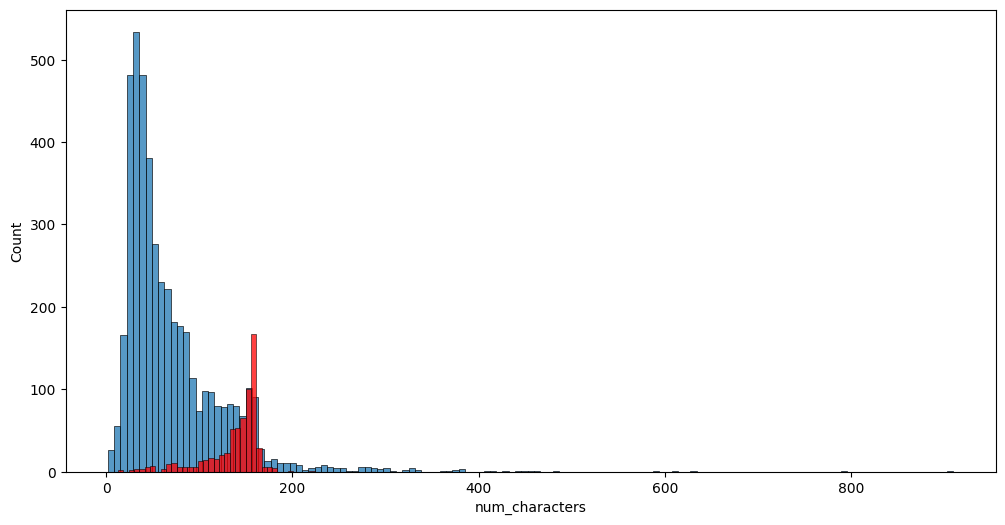

In [87]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

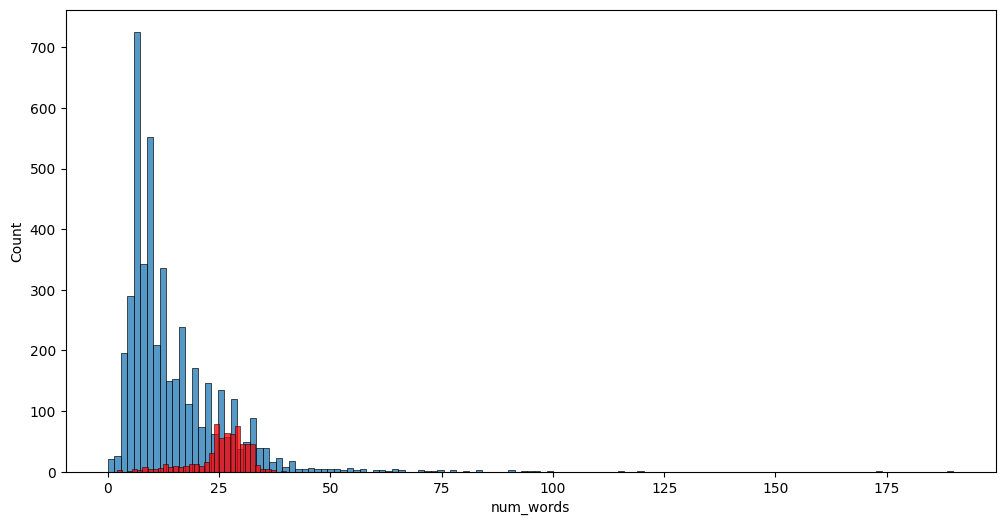

In [88]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

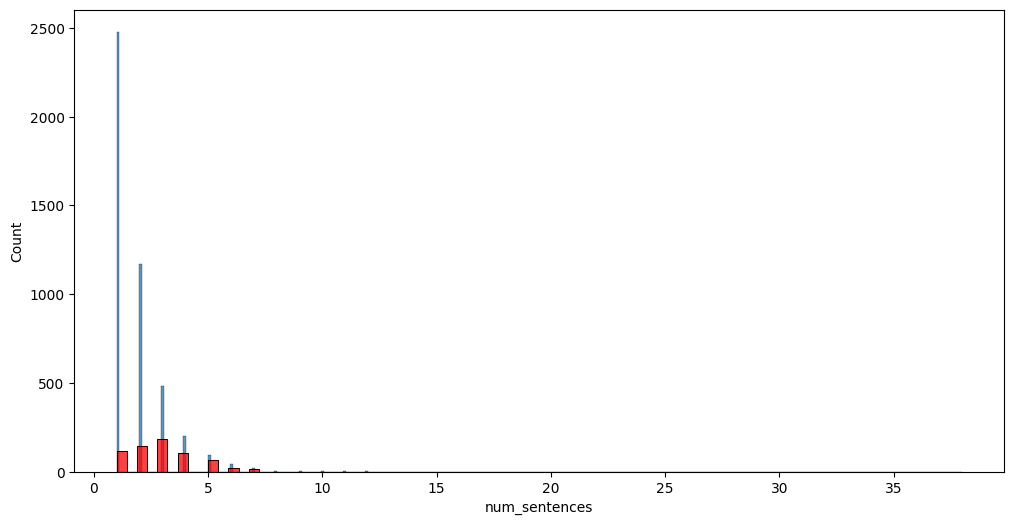

In [89]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

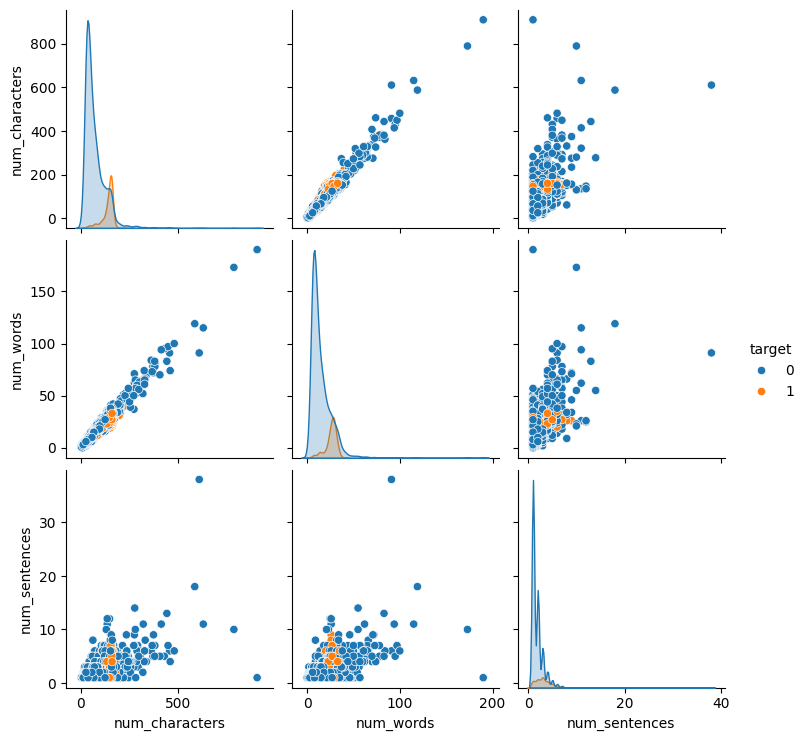

In [90]:
sns.pairplot(df,hue='target')
# A pair plot visualizes pairwise relationships between numerical features in a dataset.
# It generates scatter plots for each pair of features and histograms (or kernel density plots) for the distribution of individual features.

<Axes: >

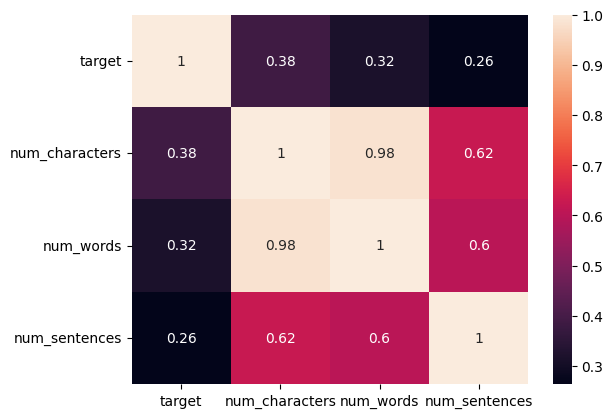

In [103]:
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(),annot=True)

## 3.Data Preprocessing

### > Lower case
### > Tokenization¶
### > Remove special characters
### > Reoving stop words and punctuation
### > stemming

In [100]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [101]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gkvku\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gkvku\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [102]:
# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [112]:
# Define preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove special characters and punctuation
    tokens = [word for word in tokens if word.isalnum()]
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    
    return " ".join(tokens)

# Apply preprocessing to the 'Text' column
df['Processed_Text'] = df['text'].apply(preprocess_text)


In [110]:
preprocess_text("But I'll b going 2 sch on mon. My sis need 2 take smth.")

'b go 2 sch mon si need 2 take smth'

In [105]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [113]:
df.head()

,target,text,num_characters,num_words,num_sentences,Processed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,nah think goe usf live around though


In [115]:
!pip install WordCloud

In [127]:
from wordcloud import WordCloud
# Create a WordCloud
wordcloud = WordCloud(width=800, height=800,min_font_size=10, background_color='white')
spam_wc = wordcloud.generate(df[df['target']==1]['Processed_Text'].str.cat(sep=" "))


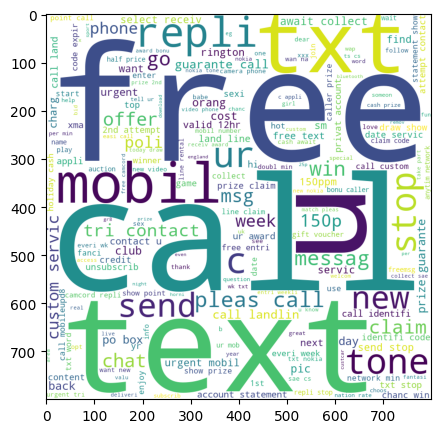

In [128]:
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc)

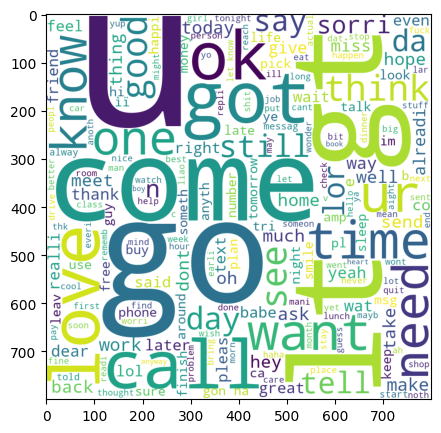

In [129]:
ham_wc = wordcloud.generate(df[df['target']==0]['Processed_Text'].str.cat(sep=" "))
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc)

In [132]:
spam_corpus = []
for msg in df[df['target'] == 1]['Processed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [133]:
len(spam_corpus)

9939

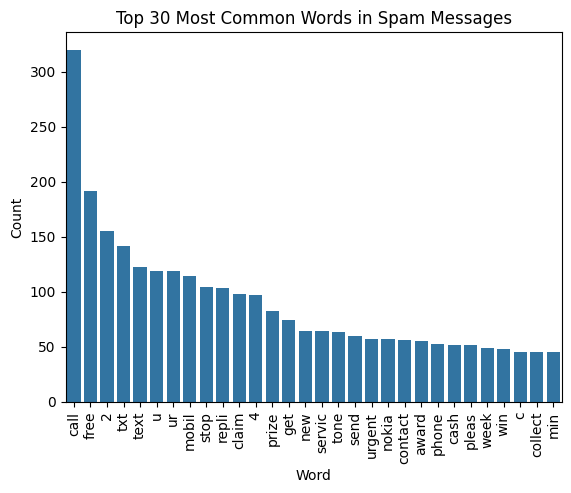

In [138]:
from collections import Counter
import random
# Get the 30 most common words and their counts
common_words = Counter(spam_corpus).most_common(30)

# Convert to a DataFrame
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(len(common_words_df))]

# Plot using seaborn
sns.barplot(x='Word', y='Count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Messages")
plt.show()

## 4.Model Building

In [173]:
# Naive
# need to convert text to number using bag of word(BoW)
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

# Fit and transform the text data into vectors
X = tfidf.fit_transform(df['Processed_Text']).toarray()


In [174]:
X.shape

(5169, 3000)

In [175]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [177]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [178]:
gnb.fit(X_train, y_train)
# Predict on the test data
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [179]:
mnb.fit(X_train, y_train)
# Predict on the test data
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [180]:
bnb.fit(X_train, y_train)
# Predict on the test data
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [172]:
# tfidf---> mnb

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# Dictionary of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Function to evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = []
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the test data
        y_pred = model.predict(X_test)
        
        # Calculate accuracy and precision
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        
        # Store results
        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision
        })
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Evaluate all models
results_df = evaluate_models(models, X_train, X_test, y_train, y_test)

# Display results
print(results_df)

                 Model  Accuracy  Precision
0  Logistic Regression  0.956480   0.979381
1          Naive Bayes  0.970986   1.000000
2                  SVM  0.972921   0.982456
3        Random Forest  0.975822   0.974790
4                  KNN  0.905222   1.000000


In [187]:
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df

,Model,Accuracy,Precision
3,Random Forest,0.975822,0.974790
2,SVM,0.972921,0.982456
1,Naive Bayes,0.970986,1.000000
0,Logistic Regression,0.956480,0.979381
4,KNN,0.905222,1.000000


In [188]:
results_df = results_df.sort_values(by='Precision', ascending=False)
results_df

,Model,Accuracy,Precision
1,Naive Bayes,0.970986,1.000000
4,KNN,0.905222,1.000000
2,SVM,0.972921,0.982456
0,Logistic Regression,0.956480,0.979381
3,Random Forest,0.975822,0.974790


In [190]:
 results_df = results_df.sort_values(by='Accuracy', ascending=False)
best_model_table = results_df.reset_index(drop=True)
best_model_table

,Model,Accuracy,Precision
0,Random Forest,0.975822,0.974790
1,SVM,0.972921,0.982456
2,Naive Bayes,0.970986,1.000000
3,Logistic Regression,0.956480,0.979381
4,KNN,0.905222,1.000000
